In [31]:
import pandas as pd
#load Dataset
data = pd.read_csv('rfm_data.csv')

In [33]:
#Recency calculation
max_purchase_date = pd.to_datetime(data['PurchaseDate']).max()
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data['Recency'] = (max_purchase_date - data['PurchaseDate']).dt.days

In [35]:
#Frequency Calculation
frequency_df = data.groupby('CustomerID')['PurchaseDate'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

In [37]:
#Monetary Value Calculation
monetary_df = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

In [39]:
# Define quantile values for scoring (from 1 to 5)
quantiles_recency = data['Recency'].quantile(q=[0.2, 0.4, 0.6, 0.8])
quantiles_frequency = frequency_df['Frequency'].quantile(q=[0.2, 0.4, 0.6, 0.8])
quantiles_monetary = monetary_df['Monetary'].quantile(q=[0.2, 0.4, 0.6, 0.8])


In [41]:
# Function to calculate R, F, and M scores
def r_score(x):
    if x <= quantiles_recency[0.2]:
        return 5
    elif x <= quantiles_recency[0.4]:
        return 4
    elif x <= quantiles_recency[0.6]:
        return 3
    elif x <= quantiles_recency[0.8]:
        return 2
    else:
        return 1
def fm_score(x, quantiles):
    if x <= quantiles[0.2]:
        return 1
    elif x <= quantiles[0.4]:
        return 2
    elif x <= quantiles[0.6]:
        return 3
    elif x <= quantiles[0.8]:
        return 4
    else:
        return 5

In [47]:
# Apply scoring functions to calculate R, F, and M scores
data['R_Score'] = data['Recency'].apply(r_score)
frequency_df['F_Score'] = frequency_df['Frequency'].apply(fm_score, quantiles=quantiles_frequency)
monetary_df['M_Score'] = monetary_df['Monetary'].apply(fm_score, quantiles=quantiles_monetary)

In [49]:
# Customer Segmentation
data['RFM_Segment'] = data['R_Score'].astype(str) + frequency_df['F_Score'].astype(str) + monetary_df['M_Score'].astype(str)
segment_dict = {
    '555': 'High-Value Customer',
    '155': 'Potential Loyalist',
    '515': 'New Customer',
    '551': 'At Risk',
    '111': 'Churned Customer'
}
data['Segment'] = data['RFM_Segment'].map(segment_dict)

In [51]:
# Save segmented data to a new CSV file
data.to_csv('segmented_rfm_data.csv', index=False)

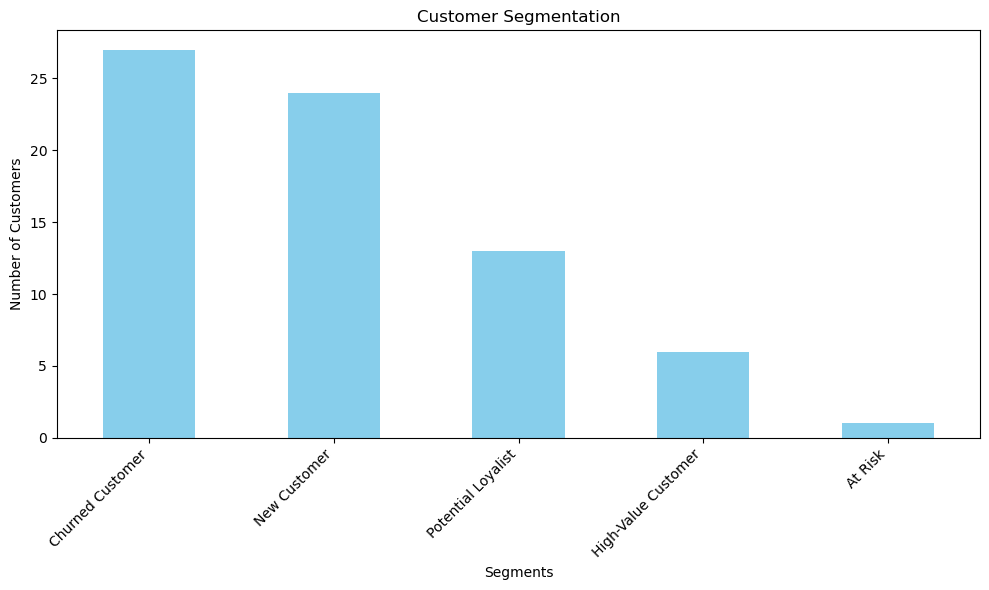

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the segmented data
data = pd.read_csv('segmented_rfm_data.csv')

# Count the number of customers in each segment
segment_counts = data['Segment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation')
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
